In [188]:
# Read uspto dataset
import pandas as pd
import numpy as np
import nltk


df = pd.read_csv('./dataset/df-claim-A.csv')
df_claim=df[["ID","Title","Claim","cpc_subclass"]]
df_claim= df_claim.dropna()
df_claim = df_claim.reset_index(drop=True)
df_claim.head()

,ID,Title,Claim,cpc_subclass
0,8927300,Method and compositions for the detection of p...,1. A compound of the formula: wherein R is a s...,"C07H,C07K,C12N,C12Q,G01N"
1,8930992,TV social network advertising,"1. An advertising method, comprising: displayi...","G06Q,H04N"
2,8929358,Call flow system and method for use in a legac...,"1. A method, comprising: receiving, from a mob...","H04L,H04M,H04Q,H04W,H05K"
3,8925531,Spark plug degradation detection,1. A method of controlling an engine cylinder ...,"F02D,F02P,Y02T"
4,8927955,Resistance change memory,1. A resistance change memory comprising: a fi...,"B82Y,G11C,H01L"


In [189]:
len(df_claim)

1428600

In [190]:
df_claim_uspto = df_claim[df_claim['cpc_subclass'].str.contains(r'\bH[\w]*|,[\s]*H[\w]*')]
df_claim_uspto.head()

,ID,Title,Claim,cpc_subclass
1,8930992,TV social network advertising,"1. An advertising method, comprising: displayi...","G06Q,H04N"
2,8929358,Call flow system and method for use in a legac...,"1. A method, comprising: receiving, from a mob...","H04L,H04M,H04Q,H04W,H05K"
4,8927955,Resistance change memory,1. A resistance change memory comprising: a fi...,"B82Y,G11C,H01L"
6,8928653,"Information processing system, information pro...",1. An information processing system comprising...,"A63F,G06F,H04N"
7,8930595,Memory switch for interconnecting server nodes,1. A computer-implemented method for transferr...,"G06F,H04L"


In [191]:
#df_claim=df_claim[["grant_id","patent_title","claims_text","abstract", "main_classification"]]
df_claim_uspto["Claim"]= df_claim_uspto["Claim"].dropna()
df_claim_uspto = df_claim_uspto.reset_index(drop=True)
df_claim_uspto.head()

C:\Users\admin\AppData\Local\Temp/ipykernel_29844/1681520836.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_claim_uspto["Claim"]= df_claim_uspto["Claim"].dropna()


,ID,Title,Claim,cpc_subclass
0,8930992,TV social network advertising,"1. An advertising method, comprising: displayi...","G06Q,H04N"
1,8929358,Call flow system and method for use in a legac...,"1. A method, comprising: receiving, from a mob...","H04L,H04M,H04Q,H04W,H05K"
2,8927955,Resistance change memory,1. A resistance change memory comprising: a fi...,"B82Y,G11C,H01L"
3,8928653,"Information processing system, information pro...",1. An information processing system comprising...,"A63F,G06F,H04N"
4,8930595,Memory switch for interconnecting server nodes,1. A computer-implemented method for transferr...,"G06F,H04L"


In [192]:
df_claim_uspto=df_claim_uspto[:60000]
df_claim_uspto.head()

,ID,Title,Claim,cpc_subclass
0,8930992,TV social network advertising,"1. An advertising method, comprising: displayi...","G06Q,H04N"
1,8929358,Call flow system and method for use in a legac...,"1. A method, comprising: receiving, from a mob...","H04L,H04M,H04Q,H04W,H05K"
2,8927955,Resistance change memory,1. A resistance change memory comprising: a fi...,"B82Y,G11C,H01L"
3,8928653,"Information processing system, information pro...",1. An information processing system comprising...,"A63F,G06F,H04N"
4,8930595,Memory switch for interconnecting server nodes,1. A computer-implemented method for transferr...,"G06F,H04L"


# preprocessing

In [193]:
def cleantext(df_claim_uspto): 
    
    df_claim_uspto['cleaned_claims_text'] = df_claim_uspto['Claim'].replace(r'\'|\"|\,|\.|\?|\+|\-|\/|\=|\(|\)|\n|"', '', regex=True)
    
    # convert to lowercase
    df_claim_uspto['cleaned_claims_text'] = df_claim_uspto['cleaned_claims_text'].str.lower()
    
    #remove numbers
    df_claim_uspto['cleaned_claims_text'] =df_claim_uspto['cleaned_claims_text'].replace(r'\d+', '', regex = True)
        
    #remove_symbols
    df_claim_uspto['cleaned_claims_text']  = df_claim_uspto['cleaned_claims_text'].replace(r'[^a-zA-Z0-9]', " ", regex=True)
    
    #remove punctuations 
    df_claim_uspto['cleaned_claims_text'] = df_claim_uspto['cleaned_claims_text'].replace(r'[[]!"#$%\'()\*+,-./:;<=>?^_`{|}]+',"", regex = True)
    
    #remove_URL(x):
    df_claim_uspto['cleaned_claims_text']  = df_claim_uspto['cleaned_claims_text'].replace(r'https.*$', "", regex = True)
    df_claim_uspto['cleaned_claims_text'] = df_claim_uspto['cleaned_claims_text'].replace("   ", " ", regex = True)
    df_claim_uspto['cleaned_claims_text'] = df_claim_uspto['cleaned_claims_text'].replace("  ", " ", regex = True)
   
    return df_claim_uspto

df_claim_uspto = cleantext(df_claim_uspto)
df_claim_uspto.head()

,ID,Title,Claim,cpc_subclass,cleaned_claims_text
0,8930992,TV social network advertising,"1. An advertising method, comprising: displayi...","G06Q,H04N",an advertising method comprising displaying a...
1,8929358,Call flow system and method for use in a legac...,"1. A method, comprising: receiving, from a mob...","H04L,H04M,H04Q,H04W,H05K",a method comprising receiving from a mobile s...
2,8927955,Resistance change memory,1. A resistance change memory comprising: a fi...,"B82Y,G11C,H01L",a resistance change memory comprising a first...
3,8928653,"Information processing system, information pro...",1. An information processing system comprising...,"A63F,G06F,H04N",an information processing system comprising a...
4,8930595,Memory switch for interconnecting server nodes,1. A computer-implemented method for transferr...,"G06F,H04L",a computerimplemented method for transferring...


In [194]:
import nltk
from nltk.corpus import stopwords

# Load the stop words
nltk.download('stopwords')
english_stop_words = set(stopwords.words('english'))

# Define a set of patent-specific stop words
patent_stop_words = set(["invention", "apparatus", "method", "system", "device",
                         "means", "comprising", "having", "including", "wherein",
                         "according", "configured", "configured to", "configured for",
                         "one or more", "plurality", "at least", "said", "and/or",
                         "thereof", "thereto", "herein", "hereby", "hereof", "hereunder",
                         "hereto", "herewith", "respectively", "corresponding",
                         "respectively corresponding", "substantially", "generally",
                         "typically", "usually", "often", "frequently", "commonly",
                         "normally", "conventional", "traditional", "known", "prior",
                         "art", "field", "related", "disclosed", "described", "illustrated",
                         "embodiment", "example", "figure", "graph", "chart", "data",
                         "information", "section", "portion", "aspect", "aspect of",
                         "part", "feature", "detail", "particular", "certain", "some",
                         "many", "various", "multiple", "different", "differentiate",
                         "similar", "corresponding", "correspondingly", "also",
                         "in addition", "furthermore", "moreover", "additionally",
                         "especially", "particular", "particularity", "specific",
                         "specifically", "example", "exemplary", "illustrative",
                         "such as", "include", "includes", "including", "included",
                         "contain", "contains", "containing", "contained", "shown"])

# Merge the sets of stop words
stop_words = english_stop_words.union(patent_stop_words)

df_claim_uspto['cleaned_claim_text_without_Stopwprd'] = df_claim_uspto['cleaned_claims_text'].apply(lambda x: ' '.join([word for word in str(x).split() if word not in stop_words]))
df_claim_uspto.head()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\admin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,ID,Title,Claim,cpc_subclass,cleaned_claims_text,cleaned_claim_text_without_Stopwprd
0,8930992,TV social network advertising,"1. An advertising method, comprising: displayi...","G06Q,H04N",an advertising method comprising displaying a...,advertising displaying television program vide...
1,8929358,Call flow system and method for use in a legac...,"1. A method, comprising: receiving, from a mob...","H04L,H04M,H04Q,H04W,H05K",a method comprising receiving from a mobile s...,receiving mobile switching network carrier gat...
2,8927955,Resistance change memory,1. A resistance change memory comprising: a fi...,"B82Y,G11C,H01L",a resistance change memory comprising a first...,resistance change memory first interconnect li...
3,8928653,"Information processing system, information pro...",1. An information processing system comprising...,"A63F,G06F,H04N",an information processing system comprising a...,processing first processing second processing ...
4,8930595,Memory switch for interconnecting server nodes,1. A computer-implemented method for transferr...,"G06F,H04L",a computerimplemented method for transferring...,computerimplemented transferring electronic de...


In [195]:
# Import the necessary library
from nltk.stem import WordNetLemmatizer

# Create an instance of WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

# Define a function to lemmatize each word in a given text
def lemmatize_words(text):
    # Split the text into individual words
    words = text.split()
    # Apply lemmatization to each word and join them back into a string
    return " ".join([lemmatizer.lemmatize(word) for word in words])

# Apply the lemmatize_words function to the 'cleaned_claim_text_without_Stopwprd' column of the dataframe
df_claim_uspto["Lemmatized-Claim"] = df_claim_uspto["cleaned_claim_text_without_Stopwprd"].apply(lambda text: lemmatize_words(text))

# Print the resulting dataframe with the added 'Lemmatized-Cliam' column
df_claim_uspto.head()

,ID,Title,Claim,cpc_subclass,cleaned_claims_text,cleaned_claim_text_without_Stopwprd,Lemmatized-Claim
0,8930992,TV social network advertising,"1. An advertising method, comprising: displayi...","G06Q,H04N",an advertising method comprising displaying a...,advertising displaying television program vide...,advertising displaying television program vide...
1,8929358,Call flow system and method for use in a legac...,"1. A method, comprising: receiving, from a mob...","H04L,H04M,H04Q,H04W,H05K",a method comprising receiving from a mobile s...,receiving mobile switching network carrier gat...,receiving mobile switching network carrier gat...
2,8927955,Resistance change memory,1. A resistance change memory comprising: a fi...,"B82Y,G11C,H01L",a resistance change memory comprising a first...,resistance change memory first interconnect li...,resistance change memory first interconnect li...
3,8928653,"Information processing system, information pro...",1. An information processing system comprising...,"A63F,G06F,H04N",an information processing system comprising a...,processing first processing second processing ...,processing first processing second processing ...
4,8930595,Memory switch for interconnecting server nodes,1. A computer-implemented method for transferr...,"G06F,H04L",a computerimplemented method for transferring...,computerimplemented transferring electronic de...,computerimplemented transferring electronic de...


In [196]:
#tokenize corpus
nltk.download('punkt')

#tokenize a string into words
def tokenize_text(text):
    tokens = nltk.word_tokenize(text)
    return tokens

# Apply the tokenization function to each row of the 'Lemmatized-Claim' column
df_claim_uspto['Claim_tokens'] = df_claim_uspto["Lemmatized-Claim"].apply(tokenize_text)
df_claim_uspto.head()

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\admin\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


,ID,Title,Claim,cpc_subclass,cleaned_claims_text,cleaned_claim_text_without_Stopwprd,Lemmatized-Claim,Claim_tokens
0,8930992,TV social network advertising,"1. An advertising method, comprising: displayi...","G06Q,H04N",an advertising method comprising displaying a...,advertising displaying television program vide...,advertising displaying television program vide...,"[advertising, displaying, television, program,..."
1,8929358,Call flow system and method for use in a legac...,"1. A method, comprising: receiving, from a mob...","H04L,H04M,H04Q,H04W,H05K",a method comprising receiving from a mobile s...,receiving mobile switching network carrier gat...,receiving mobile switching network carrier gat...,"[receiving, mobile, switching, network, carrie..."
2,8927955,Resistance change memory,1. A resistance change memory comprising: a fi...,"B82Y,G11C,H01L",a resistance change memory comprising a first...,resistance change memory first interconnect li...,resistance change memory first interconnect li...,"[resistance, change, memory, first, interconne..."
3,8928653,"Information processing system, information pro...",1. An information processing system comprising...,"A63F,G06F,H04N",an information processing system comprising a...,processing first processing second processing ...,processing first processing second processing ...,"[processing, first, processing, second, proces..."
4,8930595,Memory switch for interconnecting server nodes,1. A computer-implemented method for transferr...,"G06F,H04L",a computerimplemented method for transferring...,computerimplemented transferring electronic de...,computerimplemented transferring electronic de...,"[computerimplemented, transferring, electronic..."


# divide the dataset

In [198]:
#Divide the dataset into different size
df_claim_50K=df_claim_uspto[:50000]
df_claim_50K

,ID,Title,Claim,cpc_subclass,cleaned_claims_text,cleaned_claim_text_without_Stopwprd,Lemmatized-Claim,Claim_tokens
0,8930992,TV social network advertising,"1. An advertising method, comprising: displayi...","G06Q,H04N",an advertising method comprising displaying a...,advertising displaying television program vide...,advertising displaying television program vide...,"[advertising, displaying, television, program,..."
1,8929358,Call flow system and method for use in a legac...,"1. A method, comprising: receiving, from a mob...","H04L,H04M,H04Q,H04W,H05K",a method comprising receiving from a mobile s...,receiving mobile switching network carrier gat...,receiving mobile switching network carrier gat...,"[receiving, mobile, switching, network, carrie..."
2,8927955,Resistance change memory,1. A resistance change memory comprising: a fi...,"B82Y,G11C,H01L",a resistance change memory comprising a first...,resistance change memory first interconnect li...,resistance change memory first interconnect li...,"[resistance, change, memory, first, interconne..."
3,8928653,"Information processing system, information pro...",1. An information processing system comprising...,"A63F,G06F,H04N",an information processing system comprising a...,processing first processing second processing ...,processing first processing second processing ...,"[processing, first, processing, second, proces..."
4,8930595,Memory switch for interconnecting server nodes,1. A computer-implemented method for transferr...,"G06F,H04L",a computerimplemented method for transferring...,computerimplemented transferring electronic de...,computerimplemented transferring electronic de...,"[computerimplemented, transferring, electronic..."
...,...,...,...,...,...,...,...,...
49995,9058053,Virtual reality display system,1. An apparatus comprising: a head tracker con...,"G02B,G06F,H04N",an apparatus comprising a head tracker config...,head tracker track head position head person g...,head tracker track head position head person g...,"[head, tracker, track, head, position, head, p..."
49996,9060428,Coreless multi-layer circuit substrate with mi...,1. A system comprising: a semiconductor chip; ...,"H01L,H05K,Y10T",a system comprising a semiconductor chip and ...,semiconductor chip multilayer interconnecting ...,semiconductor chip multilayer interconnecting ...,"[semiconductor, chip, multilayer, interconnect..."
49997,9059871,Policy-based communication system and method,1. A communication system comprising: a GGSN i...,H04L,a communication system comprising a ggsn incl...,communication ggsn central processing unit net...,communication ggsn central processing unit net...,"[communication, ggsn, central, processing, uni..."
49998,9059383,Hand held breast pump,1. A hand held breast pump system comprising: ...,H01L,a hand held breast pump system comprising a b...,hand held breast pump body diaphragm sealing c...,hand held breast pump body diaphragm sealing c...,"[hand, held, breast, pump, body, diaphragm, se..."


In [199]:
New_Sample = df_claim_uspto.iloc[59394:59395, :]
New_Sample

,ID,Title,Claim,cpc_subclass,cleaned_claims_text,cleaned_claim_text_without_Stopwprd,Lemmatized-Claim,Claim_tokens
59394,9083591,Communication apparatus and communication method,1. A communication apparatus for communicating...,H04L,a communication apparatus for communicating w...,communication communicating another orthogonal...,communication communicating another orthogonal...,"[communication, communicating, another, orthog..."


In [200]:
new_claim = str(New_Sample["Lemmatized-Claim"].iloc[0])
new_claim

'communication communicating another orthogonal frequencydivision multiplexing wireless communication communication modulator modulates input signal using predetermined modulation scheme assigns modulated input signal subcarriers frequency component orthogonal thereby generating subcarrier modulation signal inserter insert transmissionside series signal synthesis way element signal synthesis element transmissionside series alternately positioned thereby generating first signal synthesis generated multiplying subcarrier modulation signal predetermined signal amplitude coefficient transmissionside series generated multiplying series set whose quantity equal number subcarriers autocorrelation property autocorrelation value series whose shifted higher autocorrelation value series whose shifted predetermined series amplitude coefficient first transformer performs inverse fast fourier transformation first separator separate operation result first transformer first half second half element eq

# NMF on 50k patent

In [201]:
import pandas as pd
from gensim.models import Phrases
from gensim.corpora import Dictionary
from gensim.models import TfidfModel
from gensim.models.nmf import Nmf
from gensim.models.coherencemodel import CoherenceModel

# Tokenize the abstracts
docs = [doc.split() for doc in df_claim_50K['Lemmatized-Claim']]

# Apply n-gram (1,3)
bigram_phrases = Phrases(docs, min_count=10)
trigram_phrases = Phrases(bigram_phrases[docs], min_count=10)
#quadgram_phraser = Phrases(trigram_phrases[bigram_phrases[docs]])
docs = [trigram_phrases[bigram_phrases[doc]] for doc in docs]

# Create the dictionary and document-term matrix
id2word = Dictionary(docs)
id2word.filter_extremes(no_below=10, no_above=0.4)
corpus = [id2word.doc2bow(doc) for doc in docs]

# Compute tf-idf scores
tfidf = TfidfModel(corpus)
tfidf_corpus = tfidf[corpus]

# Train the NMF model
num_topics = 60
nmf_model = Nmf(tfidf_corpus, num_topics=num_topics, random_state=42)

# Transform the corpus to get the topic distribution for each document
nmf_output = nmf_model[tfidf_corpus]

# Calculate coherence metrics
cm_cv = CoherenceModel(model=nmf_model, corpus=tfidf_corpus, texts=docs, dictionary=id2word, coherence='c_v')
coherence_cv = cm_cv.get_coherence()

cm_npmi = CoherenceModel(model=nmf_model, texts=docs, corpus=tfidf_corpus, dictionary=id2word, coherence='c_npmi')
coherence_npmi = cm_npmi.get_coherence()

cm_umass = CoherenceModel(model=nmf_model, corpus=tfidf_corpus, dictionary=id2word, coherence='u_mass')
coherence_umass = cm_umass.get_coherence()

# Print the coherence scores
print('C_v coherence:', coherence_cv)
print('c_npmi coherence:', coherence_npmi)
print('u_mass coherence:', coherence_umass)

C_v coherence: 0.5067258751253925
c_npmi coherence: 0.0396539761676106
u_mass coherence: -3.6990778379805387


In [202]:
for i in range(num_topics):
    print(f"Topic {i}:")
    topic_words = [id2word[int(word_id)] for word_id, _ in nmf_model.show_topic(i, topn=10)]
    print(topic_words)

Topic 0:
['cell', 'area', 'measurement', 'ue', 'array', 'least_one', 'transmission', 'group', 'target', 'handover']
Topic 1:
['conductive', 'region', 'layer', 'forming', 'third', 'insulating_film', 'structure', 'contact', 'trench', 'type']
Topic 2:
['wiring', 'insulating_layer', 'beam', 'source', 'formed', 'sample', 'gate_electrode', 'wire', 'oxide_semiconductor_layer', 'insulating_film']
Topic 3:
['transistor', 'gate', 'source', 'drain', 'source_drain', 'coupled', 'gate_electrode', 'transistor_electrically_connected', 'third', 'capacitor']
Topic 4:
['member', 'plate', 'cover', 'electronic', 'opening', 'end', 'computer', 'base', 'body', 'surface']
Topic 5:
['unit', 'control', 'detection', 'processing', 'transmission', 'storage', 'setting', 'communication', 'driving', 'operation']
Topic 6:
['network', 'user_equipment', 'traffic', 'access', 'service', 'entity', 'interface', 'link', 'event', 'address']
Topic 7:
['contact', 'carrier', 'structure', 'surface', 'support', 'base', 'side', 'ele

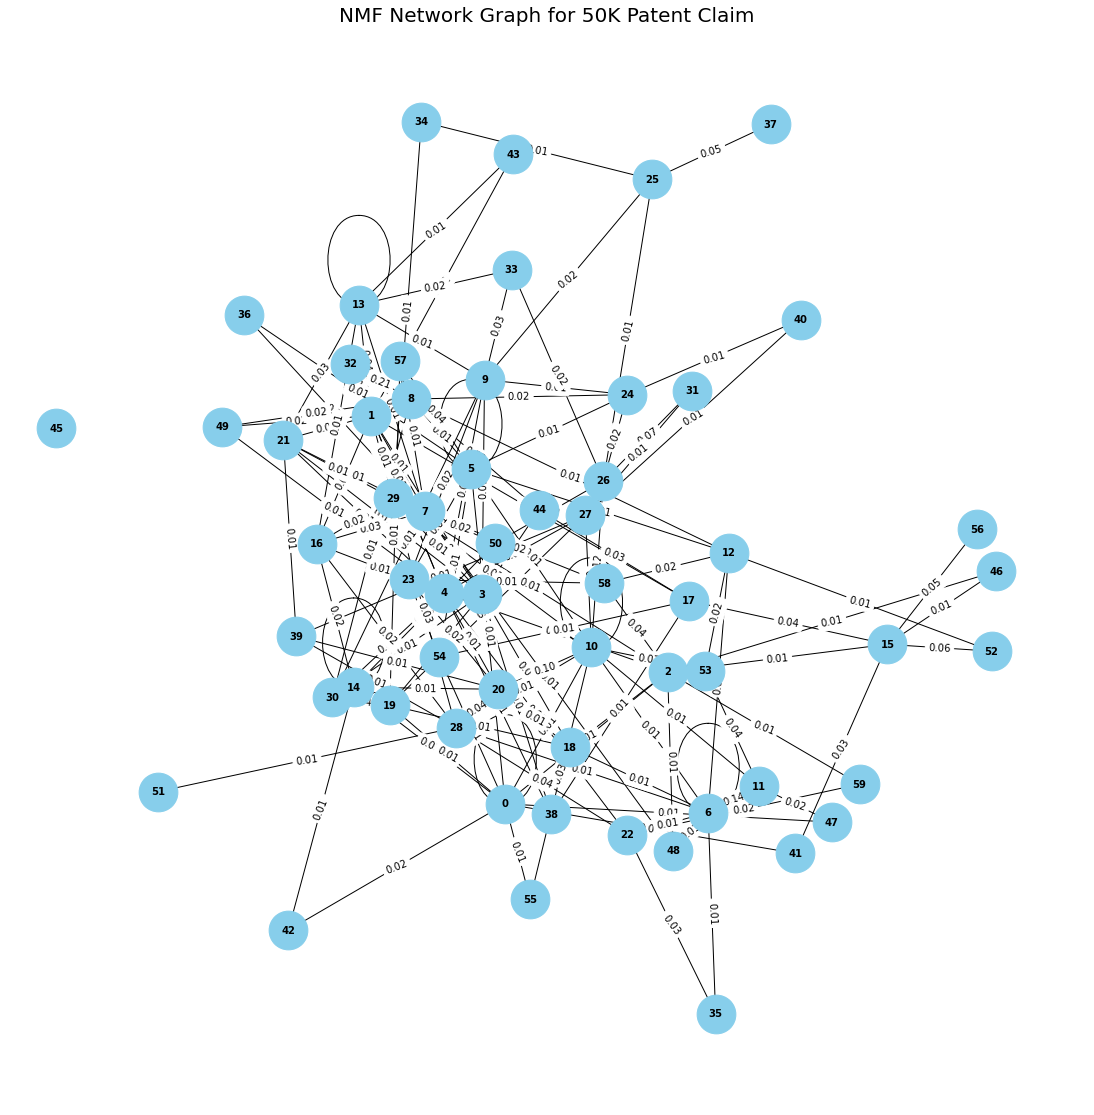

In [118]:
import networkx as nx
from collections import Counter
import matplotlib.pyplot as plt

# Get all the topic words
all_topic_words = " ".join([word for topic in nmf_model.show_topics(num_topics=60, formatted=False) for word, _ in topic[1]])

# Create a list of the most frequent words
most_frequent_words = [word for word, count in Counter(all_topic_words.split()).most_common(30)]

# Create an empty graph object
G = nx.Graph()

# Add the nodes (topics) to the graph
for i in range(60):
    G.add_node(i)

# Add the edges (terms) to the graph
for i in range(60):
    topic_words = nmf_model.show_topic(i, topn=10)
    for word, prob in topic_words:
        if word in most_frequent_words:
            j = most_frequent_words.index(word)
            G.add_edge(i, j, weight=prob)

# Draw the graph
pos = nx.spring_layout(G, seed=42)
nx.draw(G, pos, with_labels=True, node_color="skyblue", node_size=1500, font_size=10, font_weight="bold")
nx.draw_networkx_edge_labels(G, pos, edge_labels={(i, j): "{:.2f}".format(d["weight"]) for i, j, d in G.edges(data=True)})
plt.gcf().set_size_inches(15, 15)
plt.title("NMF Network Graph for 50K Patent Claim",fontsize=20)
plt.show()

In [203]:
# Get the most probable topic and its probability for each document
doc_topics = [sorted(nmf_model.get_document_topics(doc), key=lambda x: x[1], reverse=True) for doc in nmf_output]

In [204]:
# Create empty columns for topic number and probability
df_claim_50K['nmf_topics'] = 0
df_claim_50K['nmf_prob'] = 0.0

# Loop through each document and update the corresponding row in the dataframe
for i, doc in enumerate(doc_topics):
    #if len(doc) > 0:
        topic_num, topic_prob = doc[0]
        df_claim_50K.at[i, 'nmf_topics'] = topic_num
        df_claim_50K.at[i, 'nmf_prob'] = topic_prob
     

C:\Users\admin\AppData\Local\Temp/ipykernel_29844/618516136.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_claim_50K['nmf_topics'] = 0
C:\Users\admin\AppData\Local\Temp/ipykernel_29844/618516136.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_claim_50K['nmf_prob'] = 0.0


In [205]:
df_claim_50K.head()

,ID,Title,Claim,cpc_subclass,cleaned_claims_text,cleaned_claim_text_without_Stopwprd,Lemmatized-Claim,Claim_tokens,nmf_topics,nmf_prob
0,8930992,TV social network advertising,"1. An advertising method, comprising: displayi...","G06Q,H04N",an advertising method comprising displaying a...,advertising displaying television program vide...,advertising displaying television program vide...,"[advertising, displaying, television, program,...",7,0.250401
1,8929358,Call flow system and method for use in a legac...,"1. A method, comprising: receiving, from a mob...","H04L,H04M,H04Q,H04W,H05K",a method comprising receiving from a mobile s...,receiving mobile switching network carrier gat...,receiving mobile switching network carrier gat...,"[receiving, mobile, switching, network, carrie...",23,0.285882
2,8927955,Resistance change memory,1. A resistance change memory comprising: a fi...,"B82Y,G11C,H01L",a resistance change memory comprising a first...,resistance change memory first interconnect li...,resistance change memory first interconnect li...,"[resistance, change, memory, first, interconne...",18,0.350753
3,8928653,"Information processing system, information pro...",1. An information processing system comprising...,"A63F,G06F,H04N",an information processing system comprising a...,processing first processing second processing ...,processing first processing second processing ...,"[processing, first, processing, second, proces...",25,0.402072
4,8930595,Memory switch for interconnecting server nodes,1. A computer-implemented method for transferr...,"G06F,H04L",a computerimplemented method for transferring...,computerimplemented transferring electronic de...,computerimplemented transferring electronic de...,"[computerimplemented, transferring, electronic...",18,0.587487


In [206]:
df_Claim_50K_topic=df_claim_50K[["ID","Title","Claim","cpc_subclass","Lemmatized-Claim", "nmf_topics", "nmf_prob"]]
df_Claim_50K_topic

,ID,Title,Claim,cpc_subclass,Lemmatized-Claim,nmf_topics,nmf_prob
0,8930992,TV social network advertising,"1. An advertising method, comprising: displayi...","G06Q,H04N",advertising displaying television program vide...,7,0.250401
1,8929358,Call flow system and method for use in a legac...,"1. A method, comprising: receiving, from a mob...","H04L,H04M,H04Q,H04W,H05K",receiving mobile switching network carrier gat...,23,0.285882
2,8927955,Resistance change memory,1. A resistance change memory comprising: a fi...,"B82Y,G11C,H01L",resistance change memory first interconnect li...,18,0.350753
3,8928653,"Information processing system, information pro...",1. An information processing system comprising...,"A63F,G06F,H04N",processing first processing second processing ...,25,0.402072
4,8930595,Memory switch for interconnecting server nodes,1. A computer-implemented method for transferr...,"G06F,H04L",computerimplemented transferring electronic de...,18,0.587487
...,...,...,...,...,...,...,...
49995,9058053,Virtual reality display system,1. An apparatus comprising: a head tracker con...,"G02B,G06F,H04N",head tracker track head position head person g...,53,0.284623
49996,9060428,Coreless multi-layer circuit substrate with mi...,1. A system comprising: a semiconductor chip; ...,"H01L,H05K,Y10T",semiconductor chip multilayer interconnecting ...,23,0.181372
49997,9059871,Policy-based communication system and method,1. A communication system comprising: a GGSN i...,H04L,communication ggsn central processing unit net...,7,0.258333
49998,9059383,Hand held breast pump,1. A hand held breast pump system comprising: ...,H01L,hand held breast pump body diaphragm sealing c...,18,0.478611


In [207]:
#prediction

In [208]:
#query_tokens = quadgram_phraser[trigram_phrases[bigram_phrases[new_Abstract.split()]]]
query_tokens = trigram_phrases[bigram_phrases[new_claim.split()]]
query_bow = id2word.doc2bow(query_tokens)

# Get the topic distribution for the query
query_tfidf = tfidf[query_bow]
query_topic_dist = nmf_model[query_tfidf]

# Get the top 3 topics for the query
top_topics = sorted(query_topic_dist, key=lambda x: x[1], reverse=True)[:3]

# Print the top 3 topics with words and probabilities
for topic_id, topic_prob in top_topics:
    print(f"Topic {topic_id} (probability: {topic_prob:.2f})")

Topic 24 (probability: 0.28)
Topic 34 (probability: 0.21)
Topic 15 (probability: 0.19)


In [209]:
# filter the documents that have a predicted topic (for example here predicted topi for query is 34)

In [211]:
filter_topics_nmf=df_Claim_50K_topic[df_Claim_50K_topic['nmf_topics'] == 34]
filter_topics_nmf = filter_topics_nmf.sort_values('nmf_prob', ascending=False)
filter_topics_nmf = filter_topics_nmf.reset_index().rename(columns={'index': 'new_index'})
filter_topics_nmf

,new_index,ID,Title,Claim,cpc_subclass,Lemmatized-Claim,nmf_topics,nmf_prob
0,41615,9036732,Modeling transmitter and/or transmit observati...,1. A method comprising: connecting a nonlinear...,"H03F,H04B",connecting nonlinear component output transmit...,34,1.000000
1,9103,8947209,Radio frequency identification system using mu...,1. A radio frequency identification system tha...,"G06K,H04Q",radio frequency identification employ band tra...,34,1.000000
2,32661,9013341,Noise shaping for digital pulse-width modulators,1. A circuit comprising: an analog-to-digital ...,"H03H,H03M",circuit analogtodigital converter adc receive ...,34,1.000000
3,35868,9020011,Enabling RX signal path synchronization and al...,1. A transmit (TX) signal path circuit in a mu...,"H04B,H04L",transmit tx signal path circuit multipleinput ...,34,1.000000
4,8934,8949302,Digital front end for oversampled low-IF or ze...,1. A method comprising: decimating a digital s...,"H03M,H04B",decimating digital signal generated analog dig...,34,1.000000
...,...,...,...,...,...,...,...,...
7677,4018,8934768,Configuring a path in an optical communication...,1. A method of configuring a path between an i...,"H04B,H04J",configuring path ingres node egress node optic...,34,0.094285
7678,42357,9036735,Apparatus and method for adaptively selecting ...,1. A method for operating a transmitting node ...,"H03M,H04B,H04L",operating transmitting node wireless communica...,34,0.094126
7679,38052,9025648,Measurement of DC offsets in IQ modulators,1. A method of determining a DC offset in an I...,"H03C,H04B,H04L",determining dc offset iq modulator selecting f...,34,0.093195
7680,44151,9040183,Connecting structure for secondary battery and...,1. A connecting structure for a secondary batt...,"H01M,H01R",connecting structure secondary battery electri...,34,0.091115


In [180]:
#calculate the similarity between the query and document in dataset with the Doc2Vec embedding

In [181]:
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
from sklearn.metrics.pairwise import cosine_similarity

# Convert the list of documents to a list of sentences
sentences = [doc.split() for doc in filter_topics_nmf['Lemmatized-Claim'].tolist()]

# Create a list of TaggedDocument objects, where each TaggedDocument represents a single document in the corpus
# The words attribute of each TaggedDocument is set to a list of tokens for the corresponding document
# The tags attribute of each TaggedDocument is set to a list containing a single string, which is the index of the document in the corpus
tagged_data = [TaggedDocument(words=sentences[i], tags=[str(i)]) for i in range(len(sentences))]

# Train a Doc2Vec model on the tagged documents
# The vector_size parameter specifies the dimensionality of the document vectors
# The window parameter specifies the maximum distance between the predicted word and the context words within a sentence
# The min_count parameter specifies the minimum frequency of a word in the corpus to be included in the vocabulary
# The epochs parameter specifies the number of iterations over the corpus during training
model = Doc2Vec(tagged_data, vector_size=100, window=5, min_count=5, epochs=50)

# Infer the document vector for the new claim
# The split() method converts the string to a list of tokens
# The infer_vector() method calculates the document vector using the trained model
new_Claim_vector = model.infer_vector(new_claim.split())

# Calculate the cosine similarity between the new claim and the documents in the corpus
# The infer_vector() method is called for each document in the corpus to calculate the document vectors
doc_vectors = [model.infer_vector(sentences[i]) for i in range(len(sentences))]
similarity_scores = cosine_similarity([new_Claim_vector], doc_vectors)

In [212]:
# Add a new column to the dataframe to store the similarity scores
filter_topics_nmf['cosin_similarity_Doc2vec'] = similarity_scores[0]
filter_topics_nmf

,new_index,ID,Title,Claim,cpc_subclass,Lemmatized-Claim,nmf_topics,nmf_prob,cosin_similarity_Doc2vec
0,41615,9036732,Modeling transmitter and/or transmit observati...,1. A method comprising: connecting a nonlinear...,"H03F,H04B",connecting nonlinear component output transmit...,34,1.000000,-0.000926
1,9103,8947209,Radio frequency identification system using mu...,1. A radio frequency identification system tha...,"G06K,H04Q",radio frequency identification employ band tra...,34,1.000000,0.221341
2,32661,9013341,Noise shaping for digital pulse-width modulators,1. A circuit comprising: an analog-to-digital ...,"H03H,H03M",circuit analogtodigital converter adc receive ...,34,1.000000,0.108109
3,35868,9020011,Enabling RX signal path synchronization and al...,1. A transmit (TX) signal path circuit in a mu...,"H04B,H04L",transmit tx signal path circuit multipleinput ...,34,1.000000,-0.052827
4,8934,8949302,Digital front end for oversampled low-IF or ze...,1. A method comprising: decimating a digital s...,"H03M,H04B",decimating digital signal generated analog dig...,34,1.000000,0.155487
...,...,...,...,...,...,...,...,...,...
7677,4018,8934768,Configuring a path in an optical communication...,1. A method of configuring a path between an i...,"H04B,H04J",configuring path ingres node egress node optic...,34,0.094285,-0.110502
7678,42357,9036735,Apparatus and method for adaptively selecting ...,1. A method for operating a transmitting node ...,"H03M,H04B,H04L",operating transmitting node wireless communica...,34,0.094126,-0.010447
7679,38052,9025648,Measurement of DC offsets in IQ modulators,1. A method of determining a DC offset in an I...,"H03C,H04B,H04L",determining dc offset iq modulator selecting f...,34,0.093195,-0.086208
7680,44151,9040183,Connecting structure for secondary battery and...,1. A connecting structure for a secondary batt...,"H01M,H01R",connecting structure secondary battery electri...,34,0.091115,0.053724


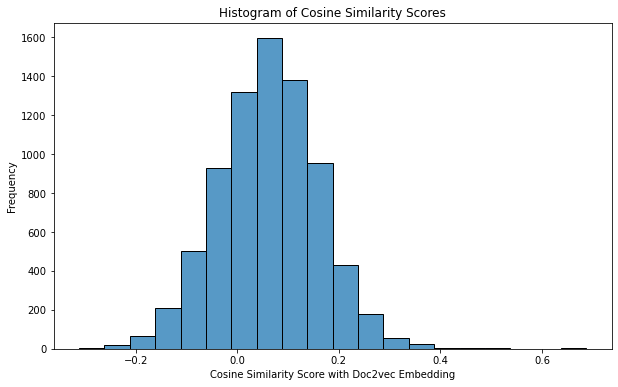

In [213]:
import seaborn as sns
import matplotlib.pyplot as plt

# Get the cosine similarity scores from the dataframe
cosine_scores = filter_topics_nmf['cosin_similarity_Doc2vec']

# Plot a histogram of the cosine similarity scores
plt.figure(figsize=(10,6))
sns.histplot(cosine_scores, bins=20)
plt.title('Histogram of Cosine Similarity Scores')
plt.xlabel('Cosine Similarity Score with Doc2vec Embedding')
plt.ylabel('Frequency')
plt.show()

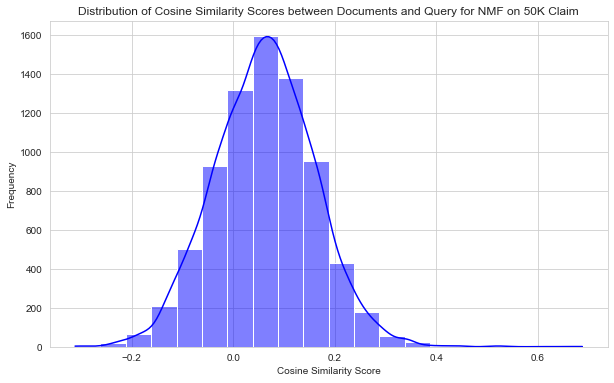

In [214]:
import seaborn as sns
import matplotlib.pyplot as plt

# Get the cosine similarity scores from the dataframe
cosine_scores = filter_topics_nmf['cosin_similarity_Doc2vec']

# Set the style of the plot
sns.set_style("whitegrid")

# Plot a histogram of the cosine similarity scores
plt.figure(figsize=(10,6))
sns.histplot(cosine_scores, bins=20, kde=True, color='blue')

# Set chart title and labels
plt.title('Distribution of Cosine Similarity Scores between Documents and Query for NMF on 50K Claim')
plt.xlabel('Cosine Similarity Score')
plt.ylabel('Frequency')

# Show plot
plt.show()

In [215]:
#get the most similar doc in dataset to query

In [216]:
# Sort the filter_topics_lda dataframe by cosine similarity score in descending order
filter_topics_nmf = filter_topics_nmf.sort_values(by=['cosin_similarity_Doc2vec'], ascending=False)

# Get the document with the highest cosine similarity score
most_similar_doc = filter_topics_nmf.iloc[0]['Claim']

most_similar_doc

'1. A communication apparatus for communicating with another apparatus in orthogonal frequency-division multiplexing wireless communication, the communication apparatus comprising: a modulator that generates a modulation signal by dividing a data series equally into a certain number a factorial of which is equal to or greater than a number of patterns expressed by data of an input signal to generate subdata series, the data series being a set of data which has an autocorrelation property such that an autocorrelation value with a data series whose data has not been shifted is higher than an autocorrelation value with a data series whose data has been shifted, performing a calculation which multiplies a predetermined amplitude coefficient and a unique number defined for each subdata series by each element of the subdata series, respectively, and rearranging the subdata series applied the calculation based on rearrangement rules which are associated with the patterns expressed by the data

In [217]:
# Sort the filter_topics_lda dataframe by cosine similarity score in descending order
filter_topics_nmf = filter_topics_nmf.sort_values(by=['cosin_similarity_Doc2vec'], ascending=False)

# Get the document with the highest cosine similarity score
most_similar_doc = filter_topics_nmf.iloc[0]['Lemmatized-Claim']

most_similar_doc

'communication communicating another orthogonal frequencydivision multiplexing wireless communication communication modulator generates modulation signal dividing series equally number factorial equal greater number pattern expressed input signal generate subdata series series set autocorrelation property autocorrelation value series whose shifted higher autocorrelation value series whose shifted performing calculation multiplies predetermined amplitude coefficient unique number defined subdata series element subdata series rearranging subdata series applied calculation based rearrangement rule associated pattern expressed input signal one one synthesizing rearranged subdata series transformer performs inverse fast fourier transformation modulation signal calculator divide calculation result transformer equally number generate sub calculation result multiplies equalization coefficient defined sub calculation result element sub calculation result synthesizer generates baseband signal ar

In [218]:
# Sort the filter_topics_lda dataframe by cosine similarity score in descending order
filter_topics_nmf = filter_topics_nmf.sort_values(by=['cosin_similarity_Doc2vec'], ascending=False)

# Get the document with the highest cosine similarity score
most_similar_doc = filter_topics_nmf.iloc[0]['ID']

most_similar_doc

8977667